<a href="https://colab.research.google.com/github/Iman-Kalyan-Majumder/MNIST-Sign-Language/blob/main/SignLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [179]:
data = pd.read_csv('sign_mnist_train.csv')

In [180]:
data.dropna()
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [181]:
pixels = data.columns[1:]
pixels

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

### Converting the Pixel Values to the Original Image

In [182]:
image1= np.array(data.iloc[0][pixels]).astype(int)
image1

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

In [183]:
image1=image1.reshape((28,28))
image1

array([[107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
        165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
        170, 169],
       [111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160, 163, 164,
        170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172, 172, 171,
        171, 170],
       [113, 123, 131, 137, 142, 145, 150, 152, 155, 158, 161, 163, 164,
        172, 105, 142, 170, 171, 171, 171, 172, 172, 173, 173, 172, 171,
        171, 171],
       [116, 125, 133, 139, 143, 146, 151, 153, 156, 159, 162, 163, 167,
        167,  95, 144, 171, 172, 172, 172, 172, 172, 173, 173, 173, 172,
        172, 171],
       [117, 126, 134, 140, 145, 149, 153, 156, 158, 161, 163, 164, 175,
        156,  87, 154, 172, 173, 173, 173, 173, 173, 174, 174, 174, 173,
        172, 172],
       [119, 128, 136, 142, 146, 150, 153, 156, 159, 163, 165, 164, 184,
        148,  89, 164, 172, 174, 174, 174, 174, 175, 175, 174, 175, 174,
        173, 173],
       [12

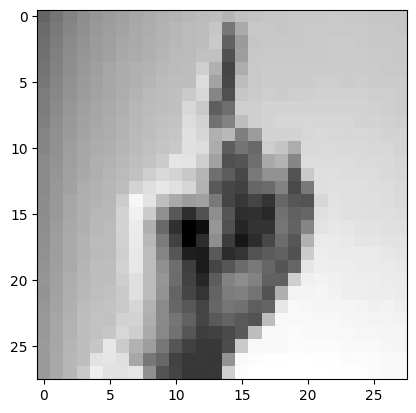

In [184]:
plt.imshow(image1,cmap='gray')
plt.show()

### Using a Deep Neural Network

In [185]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(784, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(24, activation = 'softmax')
])

In [187]:
from sklearn.model_selection import train_test_split

data=pd.get_dummies(data, columns=['label'], prefix='category')

train , test = train_test_split(data,test_size=0.2,shuffle=True)

In [198]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,category_15,category_16,category_17,category_18,category_19,category_20,category_21,category_22,category_23,category_24
8010,179,180,182,183,184,186,186,188,188,188,...,0,0,0,0,0,0,0,0,0,0
9399,142,147,151,154,158,164,168,171,173,174,...,0,0,0,0,0,0,0,0,0,0
12408,70,74,78,84,101,118,129,134,141,150,...,0,0,0,0,0,1,0,0,0,0
1364,124,127,130,132,131,132,134,134,134,134,...,0,0,0,0,0,0,0,0,0,0
3192,100,104,110,115,120,123,125,128,131,132,...,0,0,1,0,0,0,0,0,0,0


In [199]:
model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['CategoricalAccuracy']
)

In [200]:
categories = train.columns[784:]

In [201]:
history = model.fit(
    train[pixels],
    train[categories],
    batch_size=15,
    epochs=10
)

Epoch 1/10
1465/1465 [==============================] - 32s 20ms/step - loss: 1.5120 - categorical_accuracy: 0.5271
Epoch 2/10
1465/1465 [==============================] - 29s 20ms/step - loss: 0.7205 - categorical_accuracy: 0.7688
Epoch 3/10
1465/1465 [==============================] - 29s 20ms/step - loss: 0.5190 - categorical_accuracy: 0.8396
Epoch 4/10
1465/1465 [==============================] - 28s 19ms/step - loss: 0.4369 - categorical_accuracy: 0.8704
Epoch 5/10
1465/1465 [==============================] - 28s 19ms/step - loss: 0.4140 - categorical_accuracy: 0.8789
Epoch 6/10
1465/1465 [==============================] - 31s 21ms/step - loss: 0.3506 - categorical_accuracy: 0.8982
Epoch 7/10
1465/1465 [==============================] - 28s 19ms/step - loss: 0.3162 - categorical_accuracy: 0.9119
Epoch 8/10
1465/1465 [==============================] - 29s 20ms/step - loss: 0.3104 - categorical_accuracy: 0.9182
Epoch 9/10
1465/1465 [==============================] - 29s 20ms/step - 

## Training Accuracy is 93.7%

In [202]:
model.evaluate(test[pixels], test[categories])

172/172 [==============================] - 1s 6ms/step - loss: 0.0329 - categorical_accuracy: 0.9925


[0.032936230301856995, 0.9925332069396973]

### Accuracy for unseen data is 99.25%

Text(0, 0.5, 'Loss')

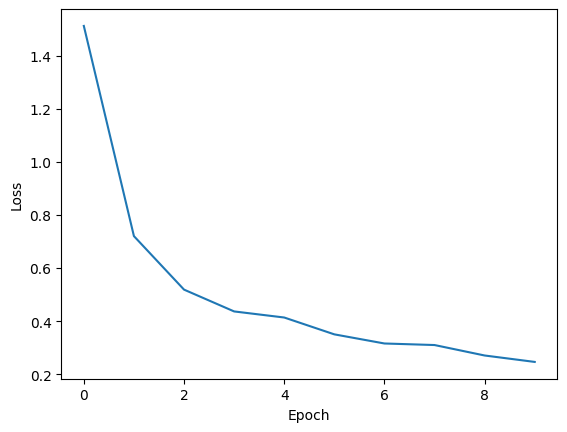

In [204]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

### Checking for some Random Data in the Test DataSet

In [205]:
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,category_15,category_16,category_17,category_18,category_19,category_20,category_21,category_22,category_23,category_24
16796,139,138,137,138,139,140,139,141,141,139,...,0,0,0,0,0,0,0,0,0,0
9679,195,196,196,195,196,196,196,196,196,194,...,0,0,0,0,0,0,0,0,0,0
235,166,167,169,170,171,171,172,172,172,172,...,0,0,1,0,0,0,0,0,0,0
6307,141,142,142,141,141,141,141,140,140,139,...,0,0,0,0,0,0,0,0,0,0
15926,193,196,199,204,207,210,214,216,219,224,...,0,0,0,0,0,0,0,0,0,0


In [207]:
test[test.columns[784:]].head()


,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,...,category_15,category_16,category_17,category_18,category_19,category_20,category_21,category_22,category_23,category_24
16796,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6307,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Image 16796 is Category 5, that is, the letter 'F'.

In [210]:
image16796 = data.iloc[16796][pixels]

In [212]:
model.predict(np.array(image16796).flatten().reshape(1,-1))

1/1 [==============================] - 0s 249ms/step


array([[1.6169950e-10, 7.2037139e-08, 6.2156768e-12, 1.0656202e-05,
        6.6868716e-10, 9.9866283e-01, 2.1340515e-13, 2.5690769e-16,
        7.2575762e-04, 1.1900280e-13, 1.3756613e-11, 1.6923777e-13,
        4.0208524e-11, 2.3729389e-07, 1.8840664e-13, 5.9814058e-04,
        6.2785076e-15, 2.2946613e-06, 3.3454458e-16, 1.3076938e-16,
        1.5212389e-13, 6.7949665e-12, 1.5708406e-16, 1.0055813e-09]],
      dtype=float32)

### Highest probability shown is for Category 5, that is, the model is 99.866% certain that the sign is for the letter 'F'.

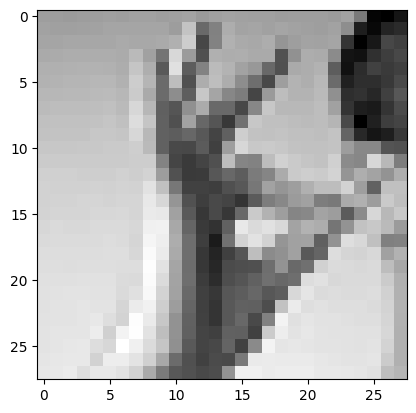

In [213]:
plt.imshow(np.array(image16796).flatten().reshape(28,28), cmap='gray')
plt.show()